<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/ML_Logistic_Regression/blob/main/algerian_forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGERIAN FOREST FIRE:

- The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- 122 instances for each region.
- The period from June 2012 to September 2012.
- The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.



##Attribute Information :-

###Period Covered

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations

- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8
- FWI Components

- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv("/content/Algerian_forest_fires_dataset.csv")
print(data.shape)
data.head(6)

(247, 14)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire


## exploring data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Target       244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
print(data.isnull().sum())
print("duplicated data", data.duplicated().sum())

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Target         3
dtype: int64
duplicated data 0


In [5]:
## removing null target
data = data.dropna(subset=['Target'])
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Target         0
dtype: int64

In [6]:
## ckecking unique value
data.day.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [7]:
## check unusal data values
data[data.day=="day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [8]:
## droping index 124
data.drop(index=124, inplace = True)
data.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
## there are so many sapces in target values so we striping the spaces and copy it to original dataset
y_true = []
for i in data.Target.values:
    strip_value = i.strip()
    y_true.append(strip_value)

## copying list into ddataframe:
data['Target'] = y_true.copy()


# mapping y  as 0 = not file and 1 = fire
data['Target'] = data['Target'].map({'not fire': '0', 'fire': '1'})
data.sample(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
33,4,7,2012,33,78,17,0,80.1,4.6,18.5,2.7,5.7,1.7,0
52,23,7,2012,27,66,22,0.4,68.2,10.5,71.3,1.8,15.4,2.1,0


In [10]:
## converting data into numeric:
for i in data.columns:
    data[i] = pd.to_numeric(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Target       243 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.5 KB


In [11]:
data.sample()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
69,9,8,2012,35,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1


In [12]:
## spliting features and targrt values
x = data.drop("Target",axis = 1)
y = data.Target

print(f"x : {x.shape}")
print(f"y : {y.shape}")

x : (243, 13)
y : (243,)


In [13]:
x.sample(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
140,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1
184,30,7,2012,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2


In [14]:
y.sample(3)

119    0
105    0
2      0
Name: Target, dtype: int64

#visualizing data

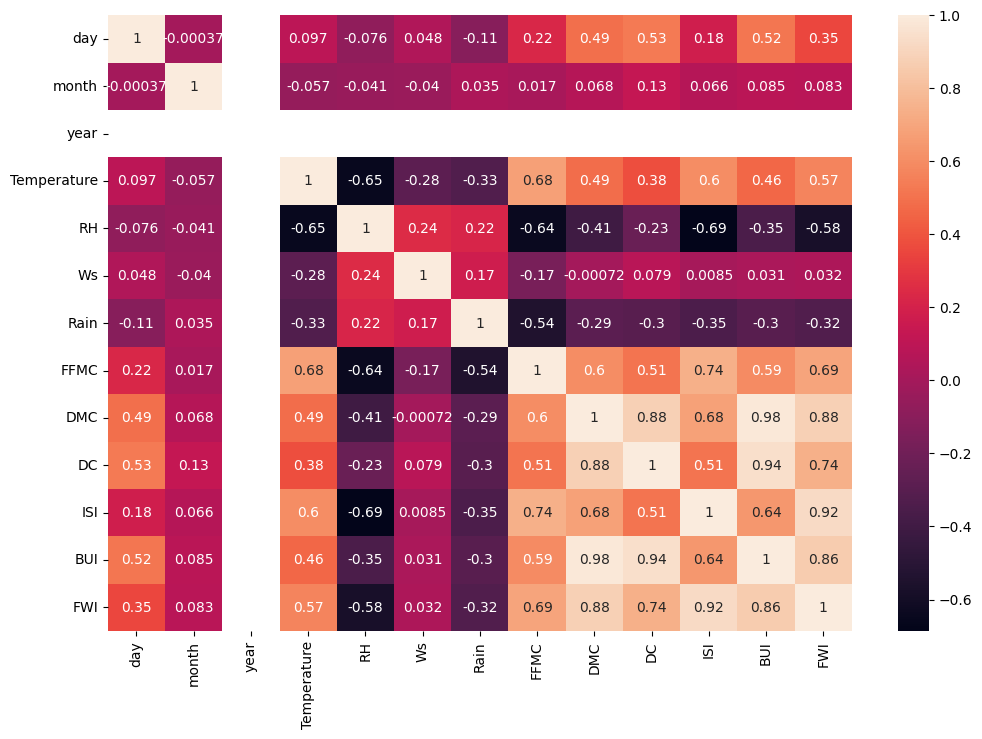

In [15]:
plt.figure(figsize=(12, 8))  # Setting size of the figure
sns.heatmap(x.corr(), annot=True)

# Display the plot
plt.show()

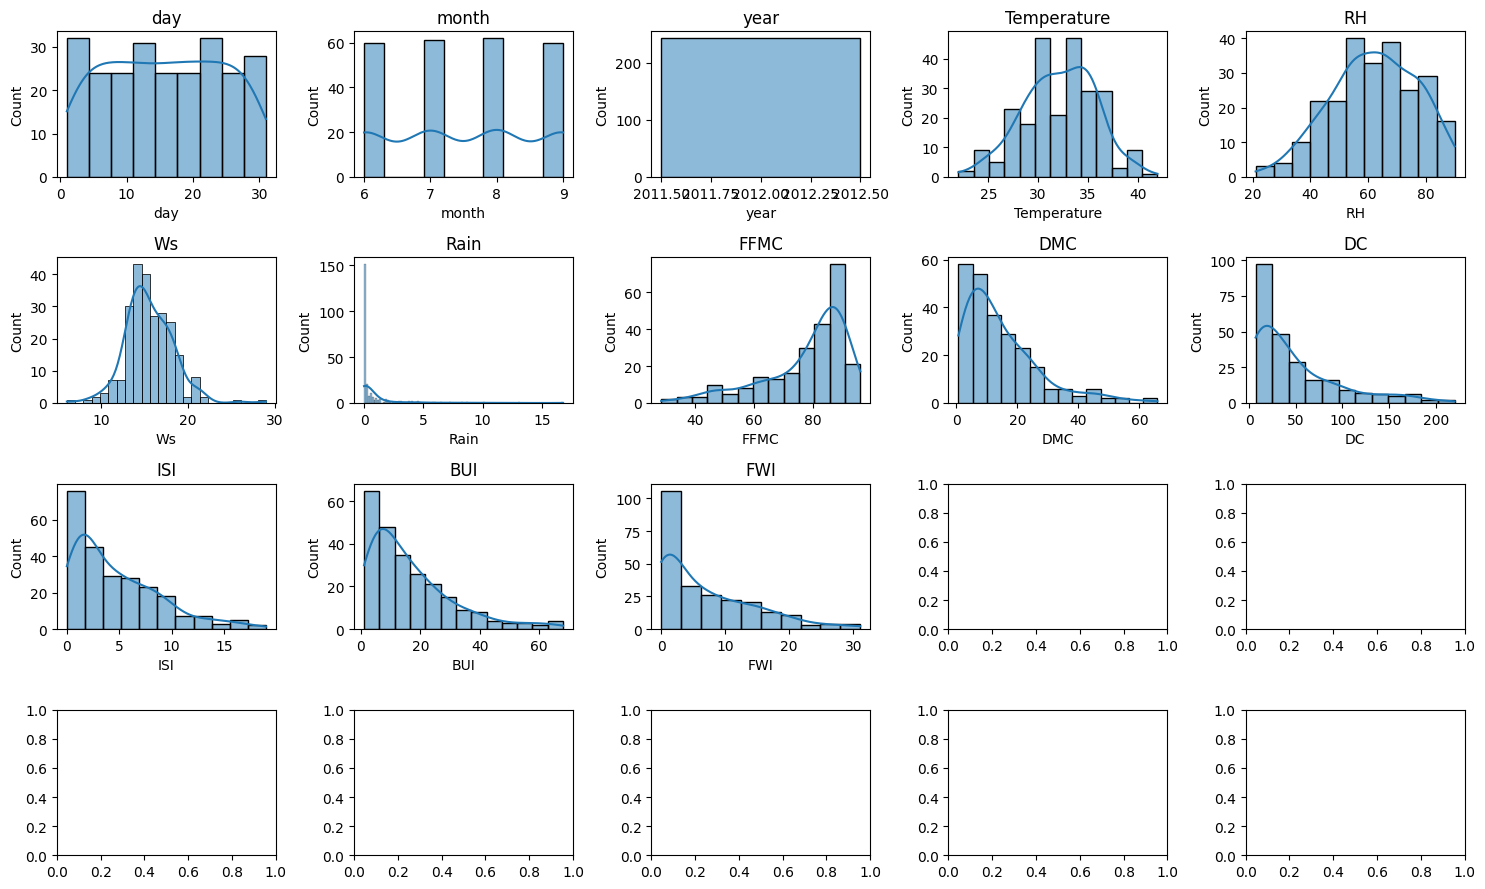

In [16]:
colu = []
for i in x.columns:
    colu.append(i)
num_rows = 4
num_cols = 5

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(colu):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [17]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [18]:
## defining the function for inter qantile range
def ranges(column,quant_1,quant_3):
    q1 = np.percentile(column,quant_1)
    q3 = np.percentile(column,quant_3)
    iqr = q3-q1

    ## higher bound:
    lower_bound = q1 = (1.5 * iqr)
    higher_bound = q3 + (1.5 * iqr)

    lower_bound = np.round(lower_bound,2)
    higher_bound = np.round(higher_bound,2)


    print(f"Q1 ({quant_1} percentile){q1}")
    print(f"Q3 ({quant_3} percentile){q3}")
    print(f"inter qantile range: {iqr}")
    print(f"lower_fence:{lower_bound}")
    print(f"higher_fence:{higher_bound}")


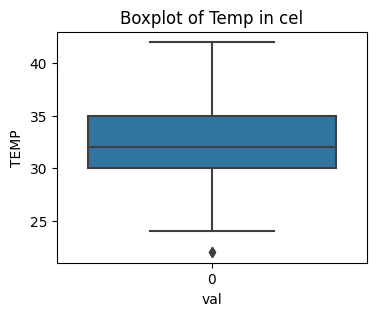

In [19]:
## boxplot for temp
plt.figure(figsize=(4, 3))
sns.boxplot(x.Temperature)
plt.xlabel('val')
plt.ylabel('TEMP')
plt.title('Boxplot of Temp in cel');

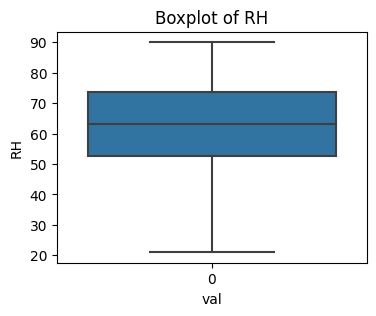

In [20]:
## box plot for RH
plt.figure(figsize=(4, 3))
sns.boxplot(x["RH"])
plt.xlabel('val')
plt.ylabel('RH')
plt.title('Boxplot of RH');

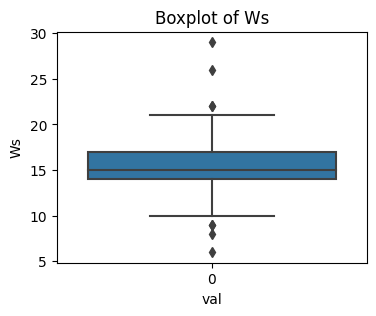

In [21]:
## box plot for RH
plt.figure(figsize=(4, 3))
sns.boxplot(x["Ws"])
plt.xlabel('val')
plt.ylabel('Ws')
plt.title('Boxplot of Ws');

In [22]:
# quantile range for ws
## quntile range
wind = x['Ws']
quant_1 = 10
quant_3 = 90

ranges(wind,quant_1,quant_3)


Q1 (10 percentile)9.0
Q3 (90 percentile)19.0
inter qantile range: 6.0
lower_fence:9.0
higher_fence:28.0


In [23]:
print("Datapoint greater then higher range")
print(x[x.Ws>28].count())
print("Datapoint lower then lower range")
print(x[x.Ws<9].count())


Datapoint greater then higher range
day            1
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
dtype: int64
Datapoint lower then lower range
day            2
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
dtype: int64


In [24]:
wind_max  = 28
wind_min = 9
for i in range(len(x.Ws)):
    if x["Ws"].values[i] > wind_max:
        x["Ws"].values[i] = wind_max
    elif x["Ws"].values[i] < wind_min:
        x["Ws"].values[i] = wind_min


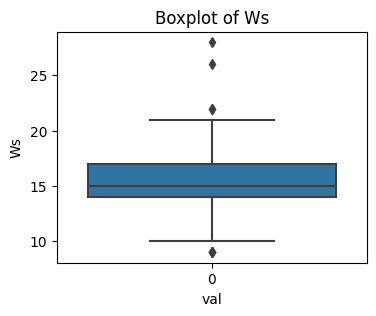

In [25]:
## box plot for RH
plt.figure(figsize=(4, 3))
sns.boxplot(x["Ws"])
plt.xlabel('val')
plt.ylabel('Ws')
plt.title('Boxplot of Ws');

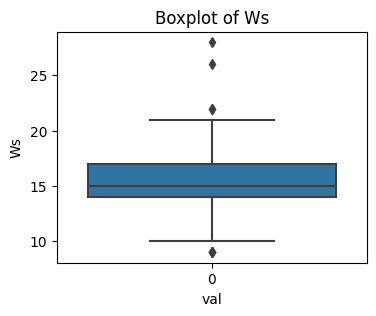

In [26]:
## box plot for RH
plt.figure(figsize=(4, 3))
sns.boxplot(x["Ws"])
plt.xlabel('val')
plt.ylabel('Ws')
plt.title('Boxplot of Ws');

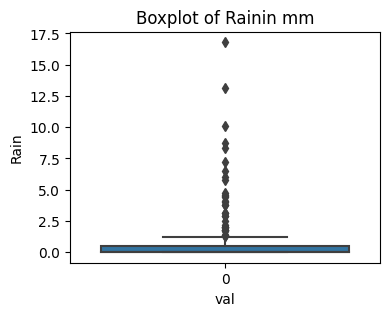

In [27]:
## box plot for Rain
plt.figure(figsize=(4, 3))
sns.boxplot(x.Rain)
plt.xlabel('val')
plt.ylabel('Rain')
plt.title('Boxplot of Rainin mm');

In [28]:
## quantile range for Rain
## quntile range
rain = x['Rain']
quant_1 = 10
quant_3 = 90

ranges(rain,quant_1,quant_3)

Q1 (10 percentile)3.0
Q3 (90 percentile)2.0
inter qantile range: 2.0
lower_fence:3.0
higher_fence:5.0


In [29]:
## Rain column Checking
x[x.Rain > 5].count()


day            9
month          9
year           9
Temperature    9
RH             9
Ws             9
Rain           9
FFMC           9
DMC            9
DC             9
ISI            9
BUI            9
FWI            9
dtype: int64

In [30]:
rain_max  = 5

for i in range(len(x.Rain)):
    if x["Rain"].values[i] > rain_max:
        x["Rain"].values[i] = rain_max

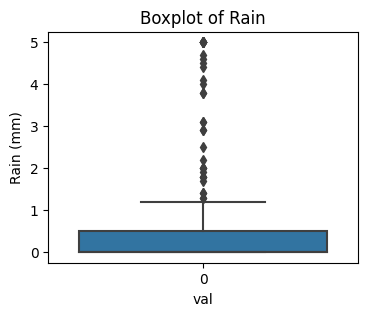

In [31]:
## box plot for Rain
plt.figure(figsize=(4, 3))
sns.boxplot(x.Rain)
plt.xlabel('val')
plt.ylabel('Rain (mm)')
plt.title('Boxplot of Rain');

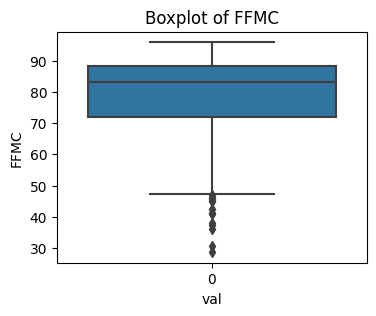

In [32]:
## box plot for FFMC
plt.figure(figsize=(4, 3))
sns.boxplot(x["FFMC"])
plt.xlabel('val')
plt.ylabel('FFMC')
plt.title('Boxplot of FFMC');

In [33]:
## FFMC RANGE under count column Checking
x[x.FFMC < 45].count()


day            9
month          9
year           9
Temperature    9
RH             9
Ws             9
Rain           9
FFMC           9
DMC            9
DC             9
ISI            9
BUI            9
FWI            9
dtype: int64

In [34]:
FFMC_min  = 45

for i in range(len(x.FFMC)):
    if x["FFMC"].values[i] < FFMC_min:
        x["FFMC"].values[i] = FFMC_min

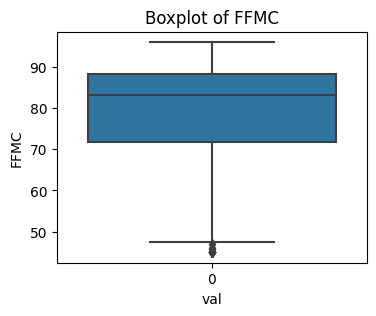

In [35]:
## box plot for FFMC
plt.figure(figsize=(4, 3))
sns.boxplot(x["FFMC"])
plt.xlabel('val')
plt.ylabel('FFMC')
plt.title('Boxplot of FFMC');

Text(0.5, 1.0, 'Boxplot of DMC')

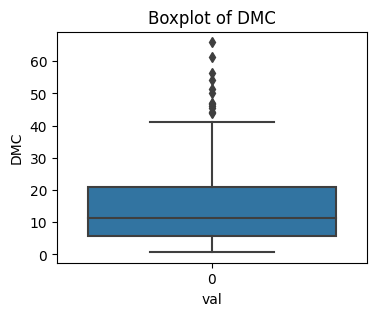

In [36]:
## box plot for DMC
plt.figure(figsize=(4, 3))
sns.boxplot(x["DMC"])
plt.xlabel('val')
plt.ylabel('DMC')
plt.title('Boxplot of DMC')

In [37]:
## quantile range for DMC
## quntile range
dmc = x['DMC']
quant_1 = 10
quant_3 = 80

ranges(dmc,quant_1,quant_3)

Q1 (10 percentile)30.06000000000001
Q3 (80 percentile)22.78000000000001
inter qantile range: 20.040000000000006
lower_fence:30.06
higher_fence:52.84


In [38]:
x[x.DMC > 50 ].count()

day            6
month          6
year           6
Temperature    6
RH             6
Ws             6
Rain           6
FFMC           6
DMC            6
DC             6
ISI            6
BUI            6
FWI            6
dtype: int64

In [39]:
DMC_max  = 50

for i in range(len(x.DMC)):
    if x["DMC"].values[i] > DMC_max:
        x["DMC"].values[i] = DMC_max

Text(0.5, 1.0, 'Boxplot of DMC')

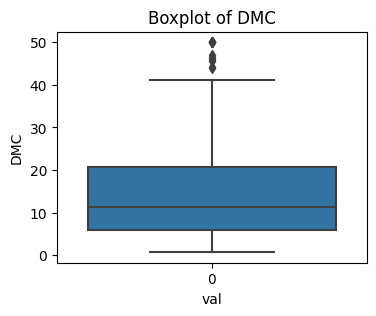

In [40]:
## box plot for DMC
plt.figure(figsize=(4, 3))
sns.boxplot(x["DMC"])
plt.xlabel('val')
plt.ylabel('DMC')
plt.title('Boxplot of DMC')

Text(0.5, 1.0, 'Boxplot of DC')

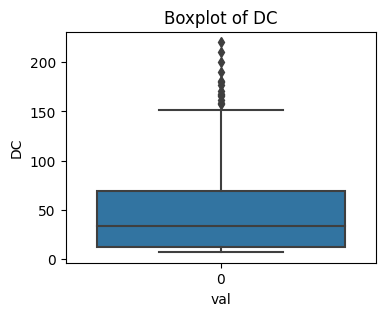

In [41]:
## box plot for DC
plt.figure(figsize=(4, 3))
sns.boxplot(x["DC"])
plt.xlabel('val')
plt.ylabel('DC')
plt.title('Boxplot of DC')

In [42]:
x[x.DC > 175 ].count()

day            7
month          7
year           7
Temperature    7
RH             7
Ws             7
Rain           7
FFMC           7
DMC            7
DC             7
ISI            7
BUI            7
FWI            7
dtype: int64

In [43]:
DC_max  = 175

for i in range(len(x.DC)):
    if x["DC"].values[i] > DC_max:
        x["DC"].values[i] = DC_max

Text(0.5, 1.0, 'Boxplot of DC')

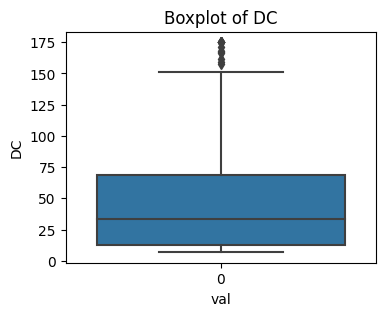

In [44]:
## box plot for DC
plt.figure(figsize=(4, 3))
sns.boxplot(x["DC"])
plt.xlabel('val')
plt.ylabel('DC')
plt.title('Boxplot of DC')

Text(0.5, 1.0, 'Boxplot of ISI')

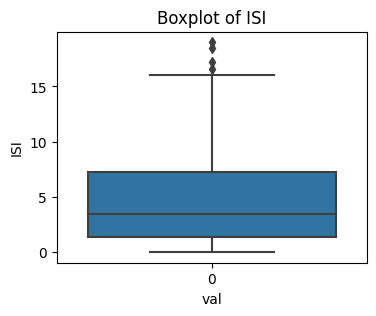

In [45]:
## box plot for DC
plt.figure(figsize=(4, 3))
sns.boxplot(x["ISI"])
plt.xlabel('val')
plt.ylabel('ISI')
plt.title('Boxplot of ISI')

In [46]:
x[x.ISI > 15 ].count()

day            8
month          8
year           8
Temperature    8
RH             8
Ws             8
Rain           8
FFMC           8
DMC            8
DC             8
ISI            8
BUI            8
FWI            8
dtype: int64

In [47]:
ISI_max  = 15

for i in range(len(x.ISI)):
    if x["ISI"].values[i] > ISI_max:
        x["ISI"].values[i] = ISI_max

Text(0.5, 1.0, 'Boxplot of ISI')

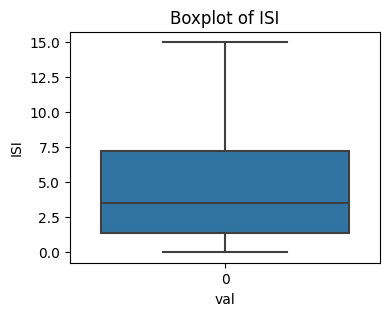

In [48]:
## box plot for DC
plt.figure(figsize=(4, 3))
sns.boxplot(x["ISI"])
plt.xlabel('val')
plt.ylabel('ISI')
plt.title('Boxplot of ISI')

Text(0.5, 1.0, 'Boxplot of BUI')

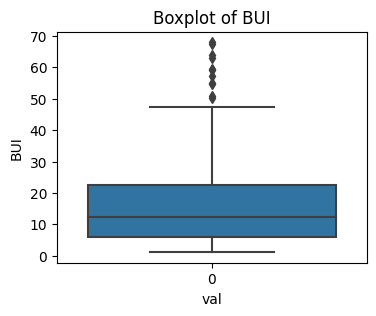

In [49]:
## box plot for Bui
plt.figure(figsize=(4, 3))
sns.boxplot(x["BUI"])
plt.xlabel('val')
plt.ylabel('BUI')
plt.title('Boxplot of BUI')

In [50]:
x[x.BUI > 55 ].count()

day            7
month          7
year           7
Temperature    7
RH             7
Ws             7
Rain           7
FFMC           7
DMC            7
DC             7
ISI            7
BUI            7
FWI            7
dtype: int64

In [51]:
BUI_max  = 55

for i in range(len(x.BUI)):
    if x["BUI"].values[i] > BUI_max:
        x["BUI"].values[i] = BUI_max

Text(0.5, 1.0, 'Boxplot of BUI')

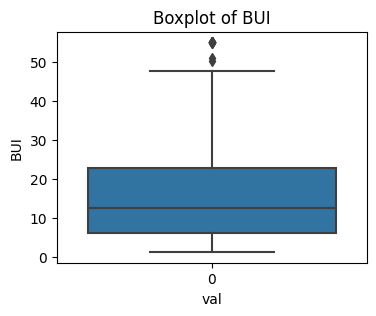

In [52]:
## box plot for BUI
plt.figure(figsize=(4, 3))
sns.boxplot(x["BUI"])
plt.xlabel('val')
plt.ylabel('BUI')
plt.title('Boxplot of BUI')

Text(0.5, 1.0, 'Boxplot of FWI')

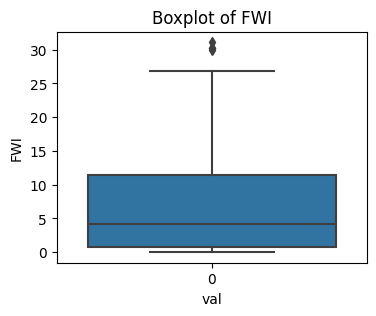

In [53]:
## box plot for FWI
plt.figure(figsize=(4, 3))
sns.boxplot(x["FWI"])
plt.xlabel('val')
plt.ylabel('FWI')
plt.title('Boxplot of FWI')

In [54]:
x[x.FWI > 26.5].count()

day            5
month          5
year           5
Temperature    5
RH             5
Ws             5
Rain           5
FFMC           5
DMC            5
DC             5
ISI            5
BUI            5
FWI            5
dtype: int64

In [55]:
FWI_max  = 26.5

for i in range(len(x.FWI)):
    if x["FWI"].values[i] > FWI_max:
        x["FWI"].values[i] = FWI_max

Text(0.5, 1.0, 'Boxplot of FWI')

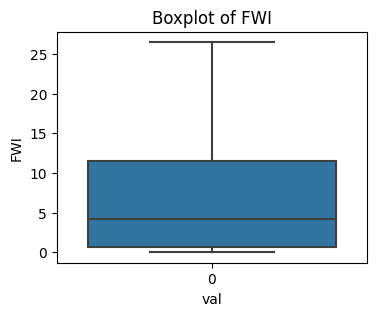

In [56]:
## box plot for FWI
plt.figure(figsize=(4, 3))
sns.boxplot(x["FWI"])
plt.xlabel('val')
plt.ylabel('FWI')
plt.title('Boxplot of FWI')

In [57]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.506173,2.745952,9.0,14.00,15.0,17.00,28.0
Rain,243.0,0.608642,1.258643,0.0,0.00,0.0,0.50,5.0
FFMC,243.0,78.110288,13.610783,45.0,71.85,83.3,88.30,96.0
DMC,243.0,14.519342,11.844942,0.7,5.80,11.3,20.80,50.0
DC,243.0,48.872840,45.971135,6.9,12.35,33.1,69.10,175.0


___
___

In [58]:
## import from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))

shape of x_train(194, 13) and have dimension: 2
shape of y_train(194,) and have dimension: 1
shape of x_test(49, 13)  and have dimension: 2
shape of y_test(49,) and have dimension: 2


In [60]:
## standarize the feature column values:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
## model logistic regrission:
log_reg = LogisticRegression()
log_model = log_reg.fit(x_train_scaled, y_train )

In [62]:
## making predictions :
y_pred = log_model.predict(x_test_scaled)

In [63]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.96      0.96      0.96        27

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



In [65]:
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")

f1_score : 0.96
accuracy_score: 0.96


## The key components of a classification report are:



- Precision is the ratio of true positives to the sum of true positives and false positives. It measures the accuracy of the positive predictions.
Recall (Sensitivity):

- Recall is the ratio of true positives to the sum of true positives and false negatives. It measures the ability of the model to identify all positive instances.

- F1-Score: The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
Support:

- Support is the number of occurrences of each class in the dataset. It helps to understand how balanced the dataset is.
Accuracy:

- Accuracy is the ratio of correctly predicted instances to the total instances in the dataset.

- Macro Avg:This is the average of precision, recall, and F1-Score across all classes. It treats all classes equally, regardless of class imbalance.


- Weighted Avg:
This is the weighted average of precision, recall, and F1-Score, taking into account the support (number of occurrences) of each class.

A classification report is particularly useful when dealing with multiclass classification problems, as it provides insights into the performance of the model for each individual class. It helps to identify which classes the model is performing well on and which may need further attention.

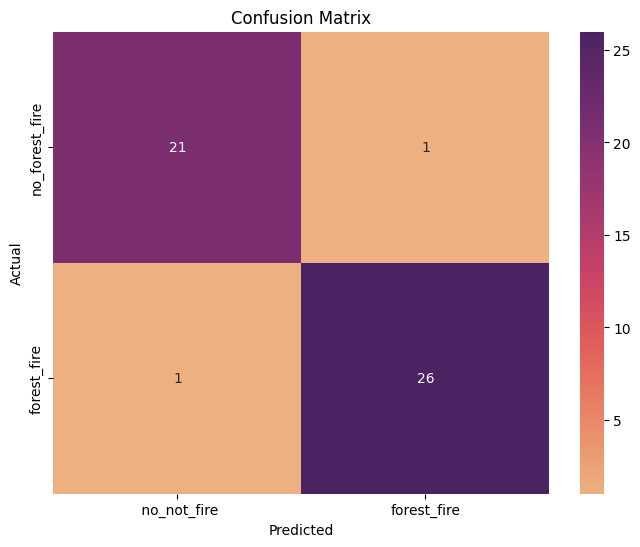

In [66]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=[' no_not_fire', 'forest_fire'], yticklabels=['no_forest_fire', 'forest_fire'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [67]:

## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""



prediction_result = []

j=0
for i in y_test:
    if i == y_pred[j]:
        results = "correct_prediction"
        prediction_result.append(results)

    else:
        results = "wrong_prediction"
        prediction_result.append(results)
    j = j+1

prediction_table = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred , "prediction_result" : prediction_result })



y_pred dimensions : 1
y_test dimension : 1


In [68]:
prediction_table.sample(49)

,Actual,Predict,prediction_result
221,0,0,correct_prediction
219,1,1,correct_prediction
45,0,0,correct_prediction
231,1,1,correct_prediction
60,1,1,correct_prediction
129,0,0,correct_prediction
244,0,0,correct_prediction
96,1,0,wrong_prediction
111,1,1,correct_prediction
82,1,1,correct_prediction
